In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

MG_imports = {
    'ESN': {
        'fixed tau': {
            'dd': {'path': "heterogeneity_final_results/2025-05-22_BL_dist_decay__tau_x_decay_2_fixed_tau.p"} ,
            'fd': {'path': "heterogeneity_final_results/2025-05-22_BL_fixed_decay__tau_x_decay_2_fixed_tau_continue.p"}
        },
        'variable tau':{
            'dd': {'path': "heterogeneity_final_results/2025-05-22_BL_dist_decay__tau_x_decay_2_variable_tau.p"},
            'fd': {'path': "heterogeneity_final_results/2025-05-22_BL_fixed_decay__tau_x_decay_2_variable_tau_continue.p"}
        }
    },
    'DDN':{
        'fixed tau': {
            'dd': {'path': "heterogeneity_final_results/2025-05-22_DDN_dist_decay__tau_x_decay_2_fixed_tau_continue.p"},
            'fd': {'path': "heterogeneity_final_results/2025-05-22_DDN_fixed_decay__tau_x_decay_2_fixed_tau.p"}
        },
        'variable tau':{
            'dd': {'path': "heterogeneity_final_results/2025-05-22_DDN_dist_decay__tau_x_decay_2_variable_tau_continue.p"},
            'fd': {'path': "heterogeneity_final_results/2025-05-22_DDN_fixed_decay__tau_x_decay_2_variable_tau.p"}
        }
    }
}

max_gen = 150

# Validation Scores
Import and plot validation performances and hyperparameters

In [2]:
for net_type in MG_imports:
    for task_type in MG_imports[net_type]:
        for het_type in MG_imports[net_type][task_type]:

            with open(MG_imports[net_type][task_type][het_type]['path'], 'rb') as f:
                MG_imports[net_type][task_type][het_type]['results_dict'] = pkl.load(f)
                print(MG_imports[net_type][task_type][het_type]['results_dict'].keys())
                print(MG_imports[net_type][task_type][het_type]['results_dict']['alpha grid'])

dict_keys(['validation performance', 'parameters', 'evolutionary strategy', 'cma stds', 'error margin', 'number of sequences', 'number of samples', 'alpha grid', 'tau list', 'start value range', 'example net'])
[1e-08, 1e-06, 0.0001, 0.01, 1]
dict_keys(['validation performance', 'parameters', 'evolutionary strategy', 'cma stds', 'error margin', 'number of sequences', 'number of samples', 'alpha grid', 'tau list', 'start value range', 'example net'])
[1e-08, 1e-06, 0.0001, 0.01, 1]
dict_keys(['validation performance', 'parameters', 'evolutionary strategy', 'cma stds', 'error margin', 'number of sequences', 'number of samples', 'alpha grid', 'tau list', 'start value range', 'example net'])
[1e-08, 1e-06, 0.0001, 0.01, 1]
dict_keys(['validation performance', 'parameters', 'evolutionary strategy', 'cma stds', 'error margin', 'number of sequences', 'number of samples', 'alpha grid', 'tau list', 'start value range', 'example net'])
[1e-08, 1e-06, 0.0001, 0.01, 1]
dict_keys(['validation perfo

In [3]:
def MG_plot_df_from_evo_dict(dict, max_gen):
    df_dict = {
        'Generation' : [],
        'Prediction Horizon' : []
    }
    best_i = np.argmax(np.mean(dict['validation performance'][:max_gen, :, :], axis=-1),axis=-1)
    plot = []
    for ind, i in enumerate(best_i):
        plot.append(dict['validation performance'][ind, i, :])
    plot = np.array(plot)

    for gen, pop in enumerate(plot):
        df_dict['Generation'] += list(np.repeat(gen, pop.shape))
        df_dict['Prediction Horizon'] += list(pop)
    df_plot = pd.DataFrame.from_dict(df_dict)
    return df_plot

In [4]:
for net_type in MG_imports:
    for task_type in MG_imports[net_type]:
        for het_type in MG_imports[net_type][task_type]:
            dict = MG_imports[net_type][task_type][het_type]['results_dict']
            plot_df = MG_plot_df_from_evo_dict(dict, max_gen)
            MG_imports[net_type][task_type][het_type]['evo_df'] = plot_df

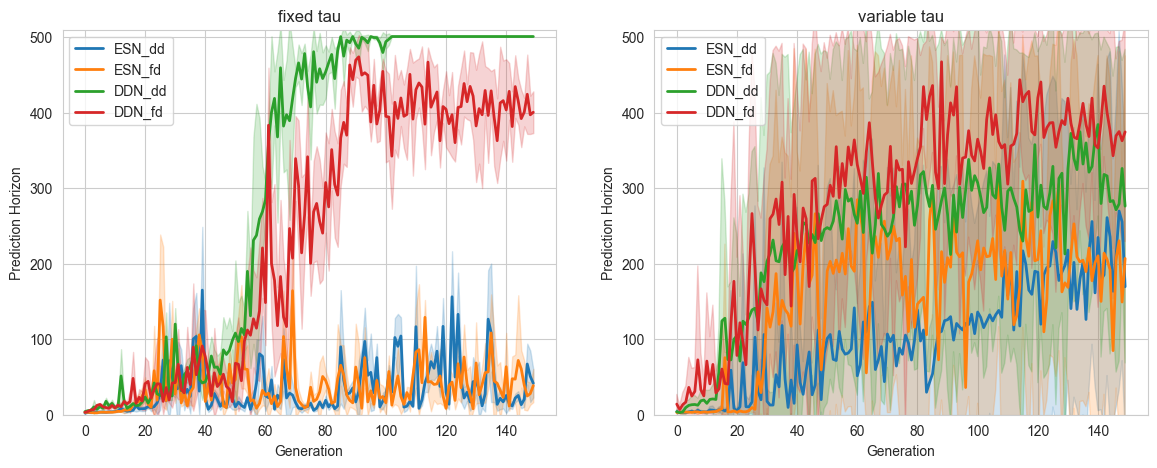

In [5]:
fig, ax= plt.subplots(1, 2, figsize=(14,5))
for net_type in MG_imports:
    for sp, task_type in enumerate(MG_imports[net_type]):
        ax[sp].set_title(task_type)
        ax[sp].set_ylim(0, 510)

        for het_type in MG_imports[net_type][task_type]:
            df_to_plot = MG_imports[net_type][task_type][het_type]['evo_df']
            plot_name = net_type + "_" + het_type
            sns.lineplot(df_to_plot, x='Generation', y='Prediction Horizon', ax=ax[sp], linewidth=2, linestyle="-",label=plot_name, errorbar='sd')

ax[0].legend(fontsize=10)
ax[1].legend(fontsize=10)


## Basic runs
Just standard ESN and DDN in fixed tau condition, as in chapter 3

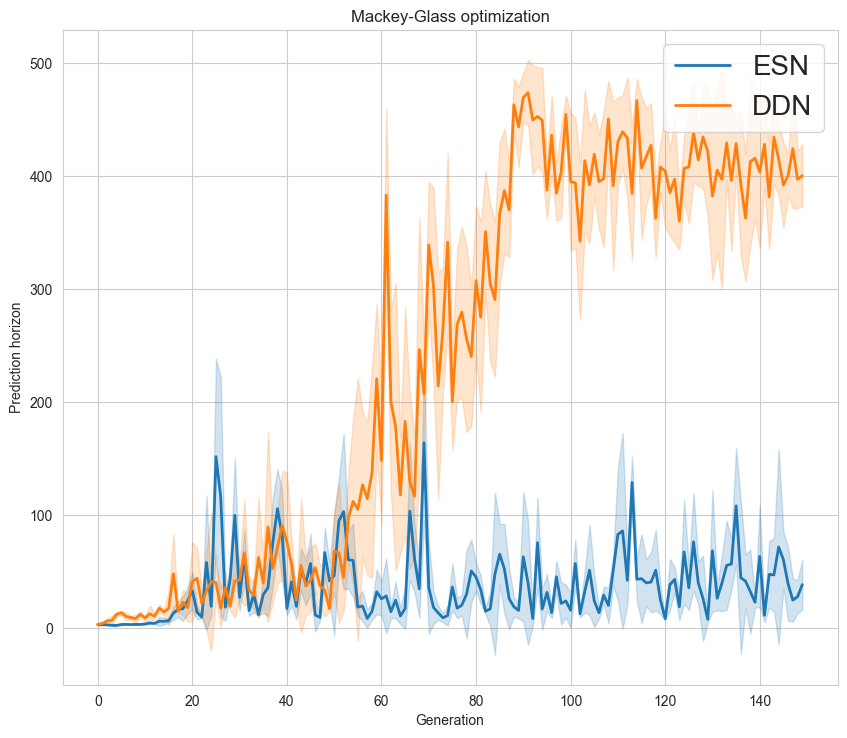

In [6]:
esn_df = MG_imports['ESN']['fixed tau']['fd']['evo_df']
ddn_df = MG_imports['DDN']['fixed tau']['fd']['evo_df']
fig, ax= plt.subplots(figsize=(10,8.5))
sns.lineplot(esn_df, x='Generation', y='Prediction Horizon', ax=ax, linewidth=2, linestyle="-",label="ESN", errorbar='sd')
sns.lineplot(ddn_df, x='Generation', y='Prediction Horizon', ax=ax, linewidth=2, linestyle="-",label="DDN", errorbar='sd')
# sns.lineplot(DDN_plot, ax=ax, linewidth=2, linestyle="-", label="DDN")
# sns.lineplot(ADDN_plot, ax=ax, linewidth=2, linestyle="-", label="ADDN")
# plt.xlim(0,200)
plt.xlabel('Generation')
plt.ylabel('Prediction horizon')
plt.title('Mackey-Glass optimization')
ax.legend(fontsize=20)

# Test
Import and plot test performances

In [7]:
for net_type in MG_imports:
    for task_type in MG_imports[net_type]:
        for het_type in MG_imports[net_type][task_type]:
            val_path = MG_imports[net_type][task_type][het_type]['path']
            test_path = val_path[:-2] + "_gen150_test_optimized.p"
            with open(test_path, 'rb') as f:
                MG_imports[net_type][task_type][het_type]['test_dict'] = pkl.load(f)
                print(MG_imports[net_type][task_type][het_type]['test_dict'].keys())


dict_keys([17])
dict_keys([17])
dict_keys([13, 15, 17, 19, 21])
dict_keys([13, 15, 17, 19, 21])
dict_keys([17])
dict_keys([17])
dict_keys([13, 15, 17, 19, 21])
dict_keys([13, 15, 17, 19, 21])


## Single Tau task

ESN dd
[[  9  36  49  14  52]
 [131 178 226 262 231]
 [ 89  76  40  66  21]
 [ 70  53  99  27  54]
 [142 168 206 260 157]
 [328 229 362 414 458]
 [ 56  50  43  88  57]
 [110 168 170 220 184]
 [228 356 279 340 203]
 [317 330 335 462 301]
 [350 397 202 311 290]
 [196 365 223 277 209]
 [306 209 443 432 296]
 [179 113  84 103 195]
 [206 138 163 187 221]
 [111 246 214 250 367]
 [ 97 139 125 150 137]
 [173 216 281 304 292]
 [225 226 196 178 202]
 [256 216 317 444 251]
 [236 347 179 245 317]
 [ 87 162 293 309 165]
 [143 141 142 195 180]
 [130 275 330 266 347]
 [ 67 123 122  92 204]
 [120 271 176 213 171]
 [333 204 280 376 278]
 [283 284 278 259 347]
 [ 15  53  64  49  47]
 [406 290 185 246 224]
 [216 435 474 343 377]
 [189 131 120 207 270]
 [312 446 347 462 394]
 [ 91  81  84  59 147]
 [155 156 100 166 116]
 [ 92 254 189 237 154]
 [174 336 254 291 251]
 [114 122 134 113 158]
 [156 191 222 243 409]
 [301 381 353 367 331]]
ESN fd
[[141  60 182 308 148]
 [285 178 191 472 270]
 [126  93 173 263 1

Text(0.5, 1.0, 'Test Fixed Tau')

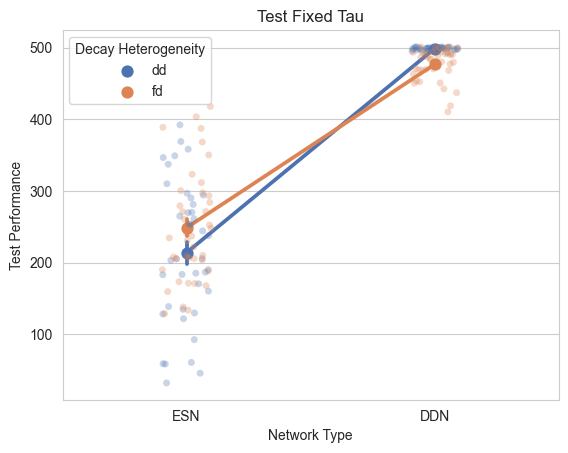

In [8]:
test_dict_pd = {
    'Network Type': [],
    'Decay Heterogeneity': [],
    'Test Performance': []
}
for net_type in MG_imports:
    for het_type in MG_imports[net_type]['fixed tau']:
        test_dict = MG_imports[net_type]['fixed tau'][het_type]['test_dict']
        test_data = np.array(test_dict[17])
        print(net_type, het_type)
        print(test_data)
        test_data = list(np.average(test_data, axis=-1))
        # print(test_data)
        n_samples = len(test_data)
        test_dict_pd['Test Performance'] += test_data
        test_dict_pd['Network Type'] += [net_type] * n_samples
        test_dict_pd['Decay Heterogeneity'] += [het_type] * n_samples

test_pd = pd.DataFrame.from_dict(test_dict_pd)
# sns.pointplot(test_df, x=x_label, y=y_label, hue=hue_label, errorbar='se', palette='deep', markers='o', markersize=5)

sns.pointplot(data=test_pd, x='Network Type', hue='Decay Heterogeneity', errorbar='se', y='Test Performance', palette='deep', markers='o')

sns.stripplot(data=test_pd, x='Network Type', hue='Decay Heterogeneity', y='Test Performance', legend=False, alpha=0.3, palette='deep')
plt.title('Test Fixed Tau')

Text(0.5, 1.0, 'Test Fixed Tau')

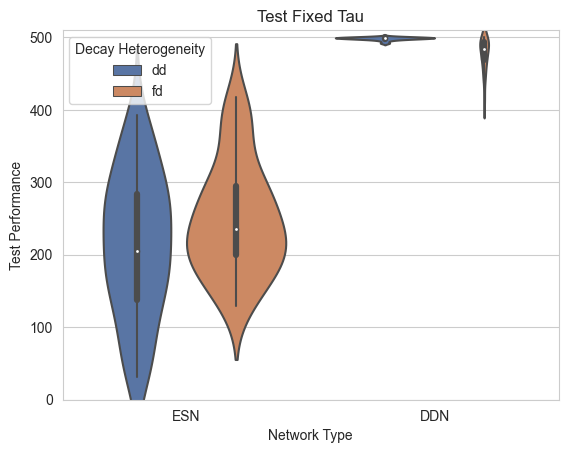

In [9]:
sns.violinplot(data=test_pd, x='Network Type', hue='Decay Heterogeneity', y='Test Performance', palette='deep')
plt.ylim(0, 510)
plt.title('Test Fixed Tau')

## Multi Tau task
Here we look at both averaged over tau and separate per tau

Text(0.5, 1.0, 'Test Variable Tau')

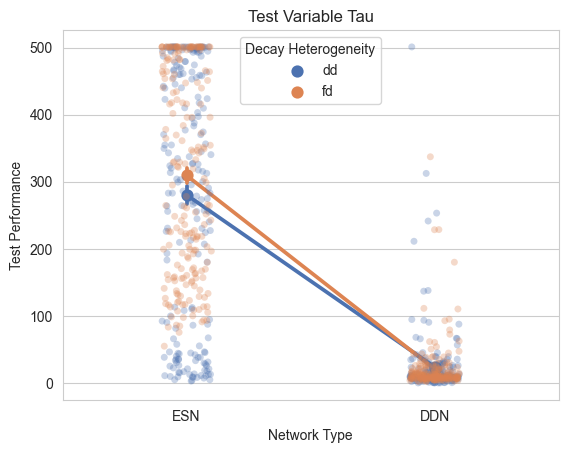

In [10]:
test_dict_pd_vt = {
    'Network Type': [],
    'Decay Heterogeneity': [],
    'Tau': [],
    'Test Performance': []
}
for net_type in MG_imports:
    for het_type in MG_imports[net_type]['variable tau']:
        test_dict = MG_imports[net_type]['variable tau'][het_type]['test_dict']
        for tau in test_dict:
            test_data = np.array(test_dict[tau])
            test_data = list(np.average(test_data, axis=-1))
            n_samples = len(test_data)
            test_dict_pd_vt['Test Performance'] += test_data
            test_dict_pd_vt['Network Type'] += [net_type] * n_samples
            test_dict_pd_vt['Decay Heterogeneity'] += [het_type] * n_samples
            test_dict_pd_vt['Tau'] += [tau] * n_samples

test_pd_vt = pd.DataFrame.from_dict(test_dict_pd_vt)
# sns.pointplot(test_df, x=x_label, y=y_label, hue=hue_label, errorbar='se', palette='deep', markers='o', markersize=5)

sns.pointplot(data=test_pd_vt, x='Network Type', hue='Decay Heterogeneity', errorbar='se', y='Test Performance', palette='deep', markers='o')

sns.stripplot(data=test_pd_vt, x='Network Type', hue='Decay Heterogeneity', y='Test Performance', legend=False, alpha=0.3, palette='deep')
plt.title('Test Variable Tau')

Text(0.5, 1.0, 'Test Variable Tau')

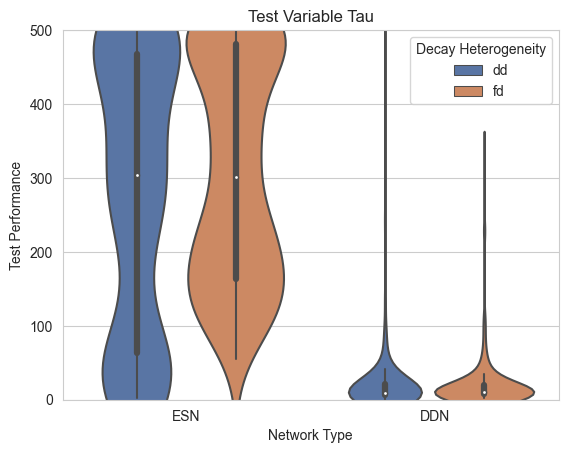

In [11]:
sns.violinplot(data=test_pd_vt, x='Network Type', hue='Decay Heterogeneity', y='Test Performance', palette='deep')
plt.ylim(0, 500)
plt.title('Test Variable Tau')

Text(0.5, 1.0, 'Distributed Decay')

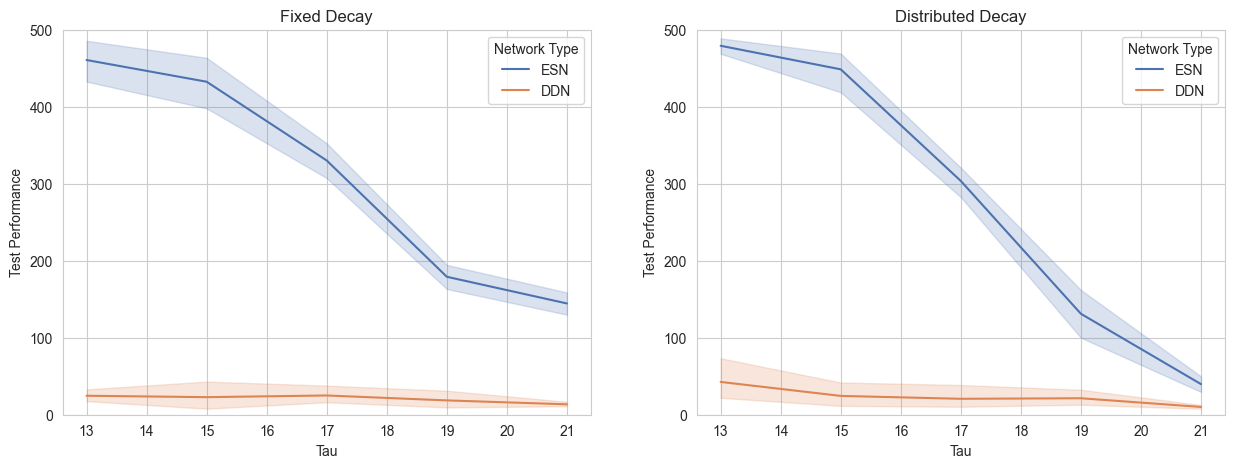

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(data=test_pd_vt[test_pd_vt['Decay Heterogeneity'] == 'fd'], x='Tau', hue='Network Type', y='Test Performance', palette='deep', ax=ax[0])
ax[0].set_ylim(0, 500)
ax[0].set_title('Fixed Decay')

sns.lineplot(data=test_pd_vt[test_pd_vt['Decay Heterogeneity'] == 'dd'], x='Tau', hue='Network Type', y='Test Performance', palette='deep', ax=ax[1])
ax[1].set_ylim(0, 500)
ax[1].set_title('Distributed Decay')

